In [ ]:

fig=plt.figure(figsize=(8, 4))

# make up some data for demo purposes
raw = np.random.randint(10, size=(6,6))
# apply some logic operatioin to the data
O = (raw >= 5) * 1   # get either 0 or 1 in the array
I = np.random.randint(10, size=(6,6))  # get 0-9 in the array

# plot each image ...
# ... side by side
fig.add_subplot(1, 2, 1)   # subplot one
plt.imshow(I, cmap=plt.cm.gray)

fig.add_subplot(1, 2, 2)   # subplot two
# my data is OK to use gray colormap (0:black, 1:white)
plt.imshow(O, cmap=plt.cm.gray)  # use appropriate colormap here
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
def lidar1(p, I1, minAngle = 0, maxAngle=72, angle=5,maxview=5):
    
    beam = np.c_[p,[p[0],p[1]+5]].T
    steps = np.arange(1,maxview,1)
    cango = []
    weights = []
    border = []
    
    beams = {}
    
    for i in np.arange(0,72):
        theta = math.radians(angle*i)
        doMap = False
        inMap = False
        x1 = p[0]
        x2 = p[1]
        for k in range(len(steps)):
            s = steps[k]

            x1 = s*np.cos(theta) + p[0]
            x2 = s*np.sin(theta) + p[1]

            x1 = int(around(x1))
            x2 = int(around(x2))
            
            I1i = I1[x2,x1]

            if (I1i == 2):
                inMap = True
                doMap = False
            elif (I1i == 0): 
                u = [x1,x2]
                if u not in border:
                    border.append([x1,x2])
                    weights.append(0)
                doMap = True
                break
            
        if doMap == False and inMap == False:
            u = [x1,x2]
            if u not in cango:
                cango.append([x1,x2])
                weights.append(1)
        if inMap == False:
            beam = np.c_[p,[x1,x2]].T
            plt.plot(beam[:,0],beam[:,1],'c-.')

    if cango:
        cango = np.c_[cango]
        plt.plot(cango[:,0], cango[:,1],'b*')
    if border:
        border = np.c_[border]
        borderMean = np.mean(border,axis=0)
        plt.plot(borderMean[0],borderMean[1],'r*')
        plt.plot(border[:,0], border[:,1],'r-')
    
    return cango, border, weights

In [ ]:

def gps_near_points(p,I1,A):
    for y in range(p[1]-10,p[1]+10):
        for x in range(p[0]-10,p[0]+10):
            if dist(p,np.r_[x,y]) < 6:
                if (I1[y,x] == 1):
                    A[y,x] = 1
                    plt.plot(x,y,'g.')
                    if (y > p[1] and I1[y+1,x]==0):
                        plt.text(x,y,str(x),zorder=2)
                        plt.plot(x,y+1,'c.',zorder=2)

def gps_cango(I1, cango):
    onpath = []
    for c in cango:
        if I1[c[1],c[0]] == 3:
            plt.plot(c[0],c[1],'m*')
            plt.text(c[0],c[1],'2')
            
            onpath.append(c)
            
        else:  
            plt.text(c[0],c[1],'1')
    return np.c_[onpath]

def build_map(A,border):
    print("build map")
    for b in border:
        x,y = b
        A[y,x] = 2




In [ ]:
def mark_visited(p, MAP):
    x,y = p
    plt.plot(x,y,'ob')
    MAP[y,x] = VISITED

def mark_seen_and_target(p, beams,MAP, target):
    
    haveNewTarget = False
    newTarget = p.copy()
    
    for i in beams:
        beam = beams[i]
        j = 0
        
        for j in range(len(beam)):
            x,y = beam[j]
            if (MAP[y,x] == MIDWAY):
                d0 = dist_vu(p,newTarget)
                d1 = dist_vuxy(p,x,y)
                if d0 < d1:
                    haveNewTarget = True
                    newTarget[:] = x,y
                
                plt.plot(x,y,'m.')
            elif (MAP[y,x] == NOWAY): 
                plt.plot(x,y,'r.')
                break
            elif (MAP[y,x] == VISITED):
                plt.plot(x,y,'b*')
            else:
                #plt.plot(x,y,'g.')
                MAP[y,x] = SEEN
    
    if haveNewTarget == True:
        target[:] = newTarget
   
    plt.plot(target[0],target[1],'r*',zorder=10)
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint as ppr



def dist_vu(v : np.ndarray,u : np.ndarray):
    return ((v[0]-u[0])**2. + (v[1]-u[1])**2.)**0.5


def dist_vuxy(v : np.ndarray, ux, uy):
    return ((v[0]-ux)**2. + (v[1]-uy)**2.)**0.5

def dist_vxyuxy(vx,vy,ux,uy):
    return ((vx-ux)**2. + (vy-uy)**2.)**0.5

import math

def around(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

def next_step_p2t(p : np.ndarray, t : np.ndarray, out : np.ndarray):
    tx,ty = t
    px,py = p
    tp = t - p
    if tp[0]:
        px = px + tp[0]/abs(tp[0])
    if tp[1]:
        py = py + tp[1]/abs(tp[1])
       
    out[0] = px
    out[1] = py

############################## 0
Target reached!
New target :%s [6 8]


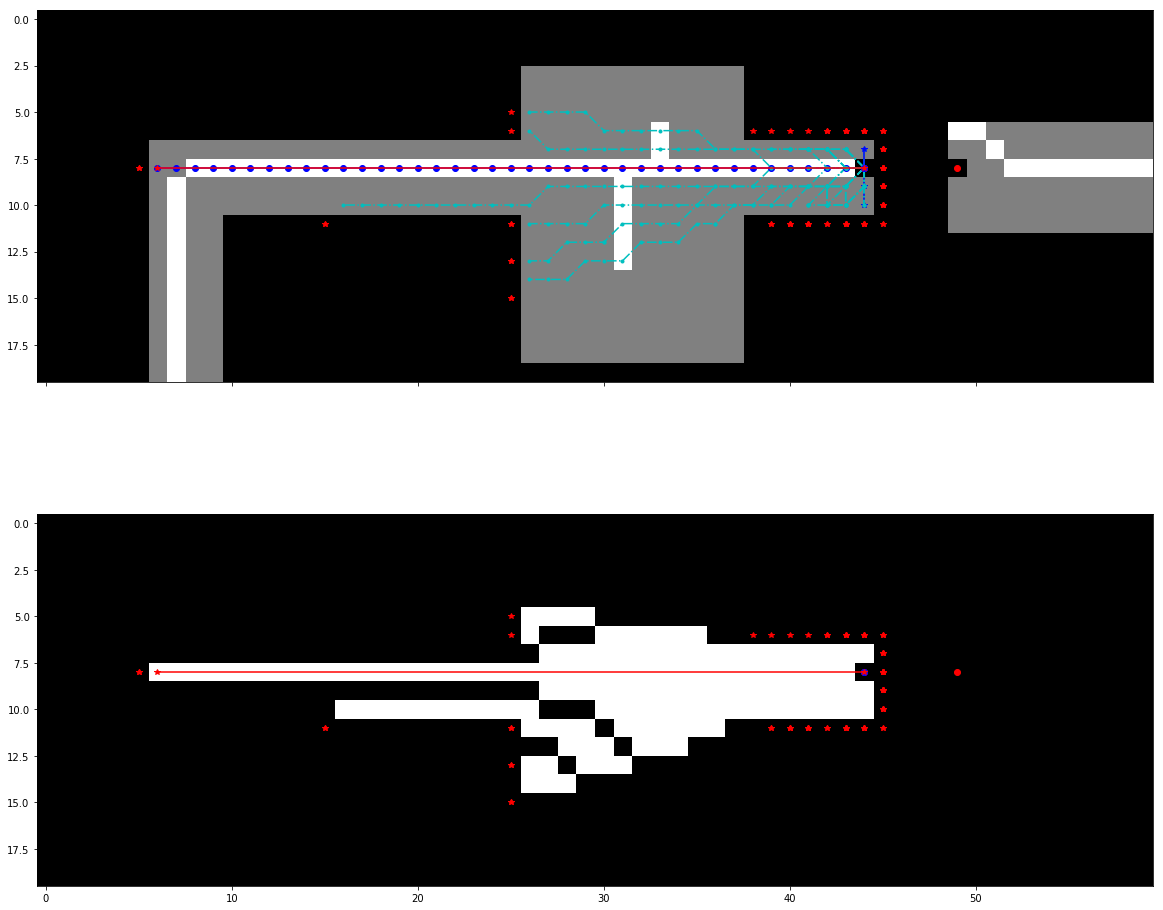

############################## 1


############################## 2


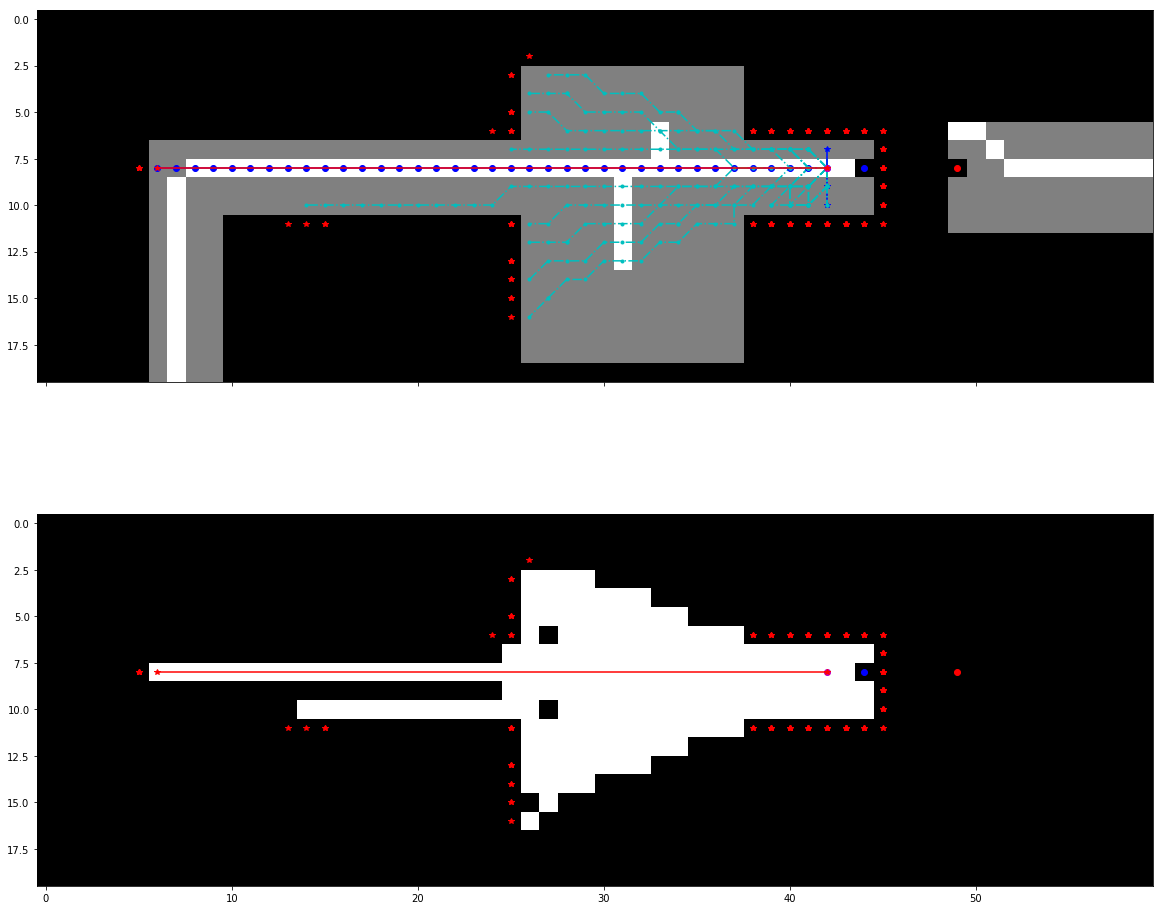

############################## 3


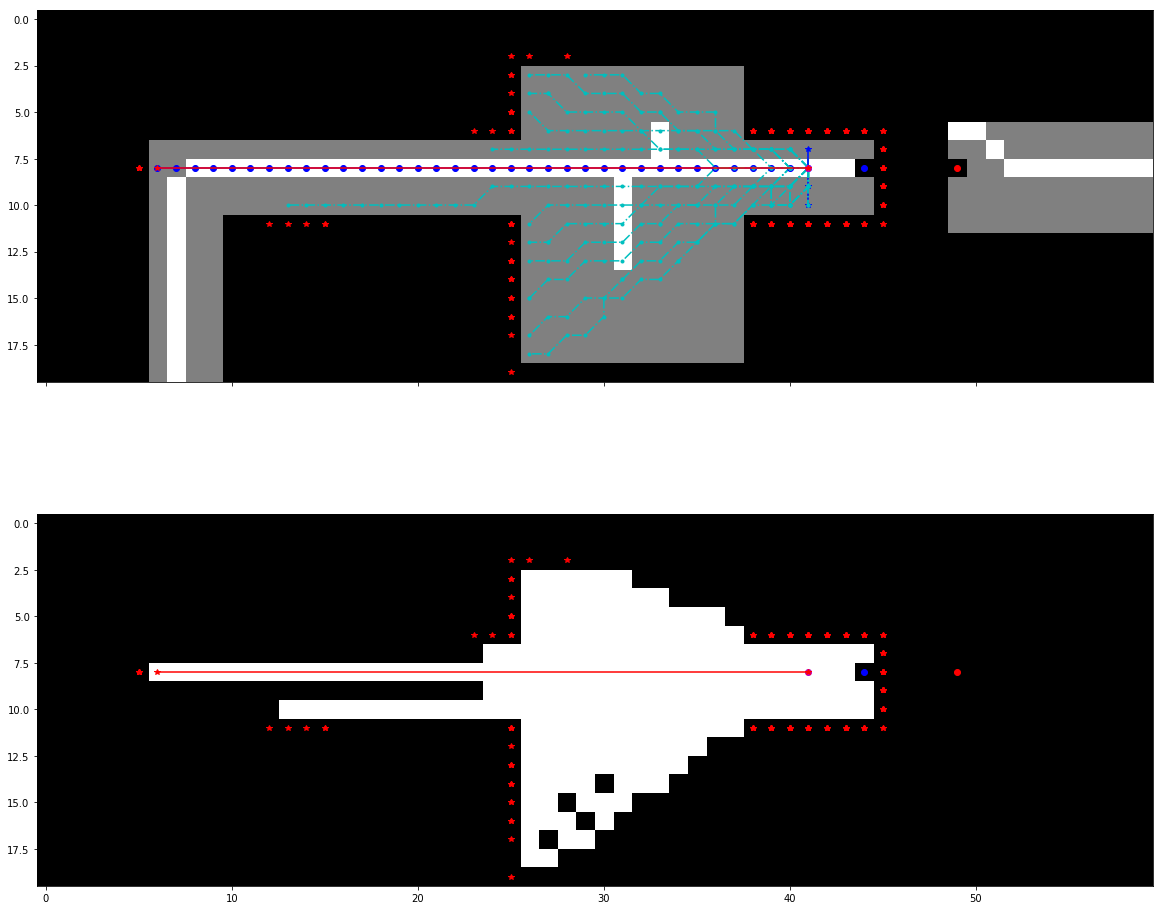

############################## 4


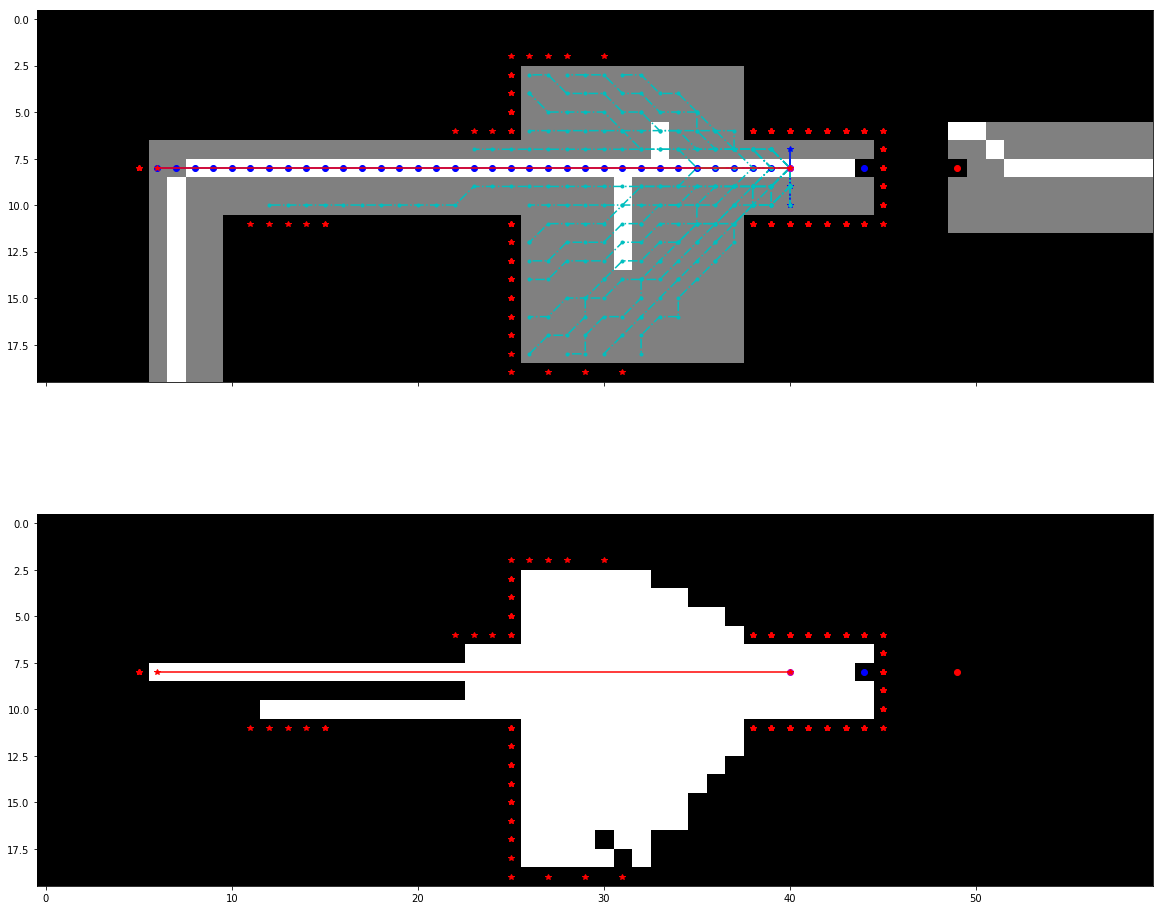

############################## 5


############################## 6


############################## 7


############################## 8


############################## 9


############################## 10


############################## 11


############################## 12


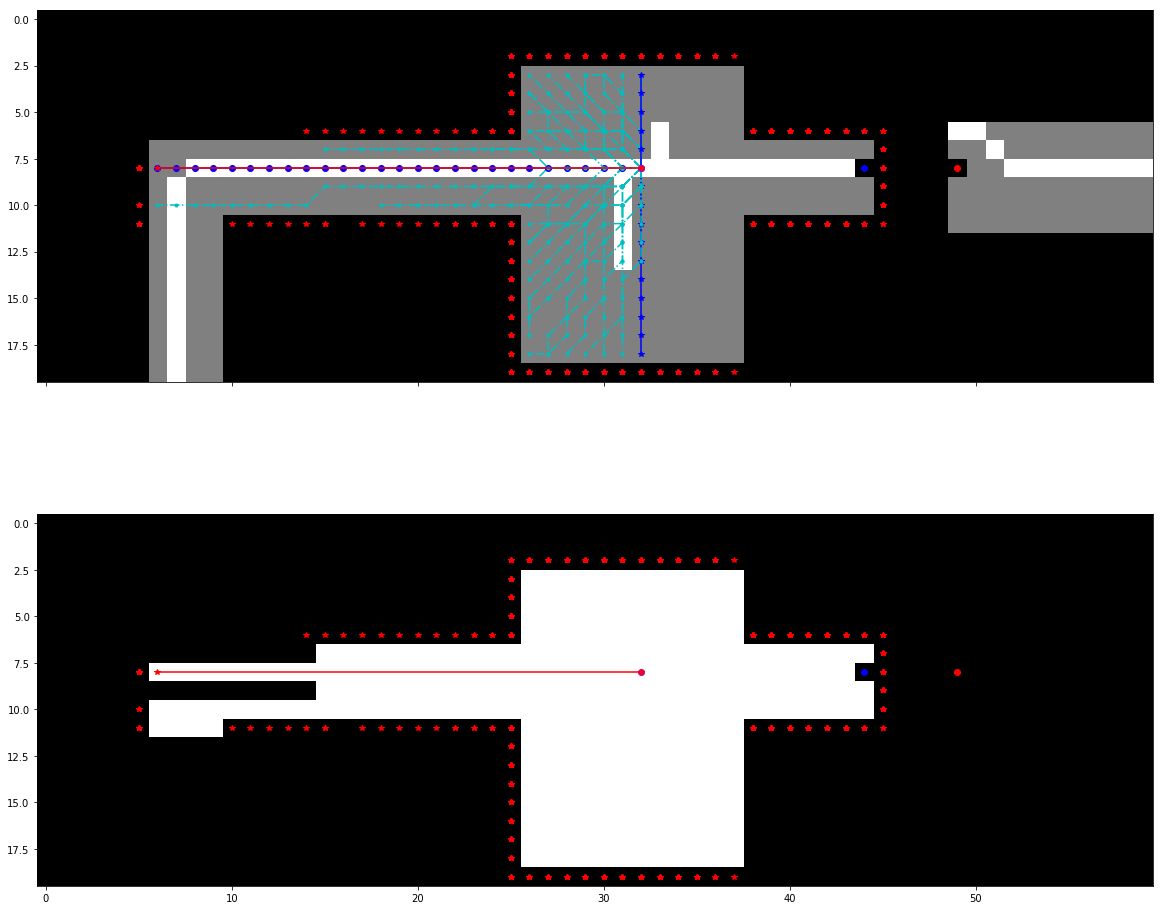

############################## 13


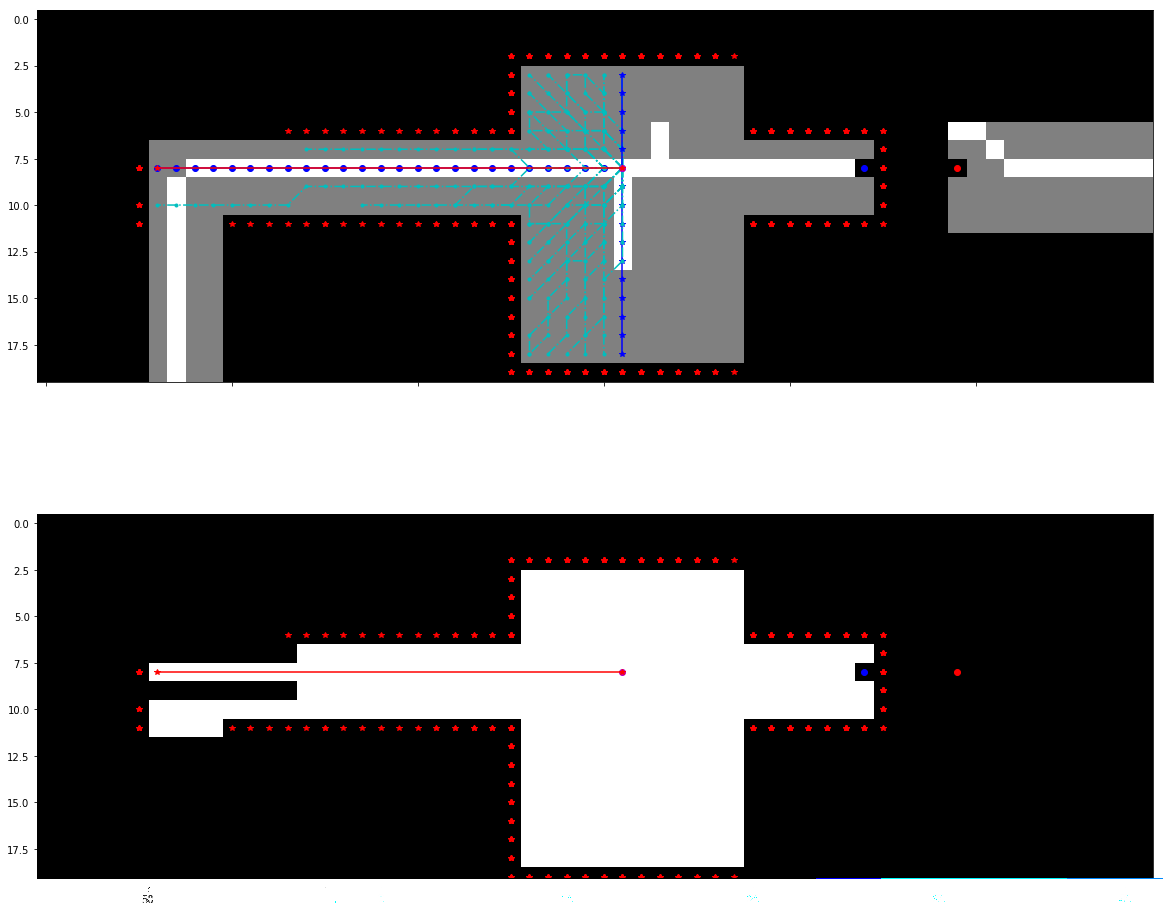

############################## 14


############################## 15


############################## 16


############################## 17


############################## 18


############################## 19


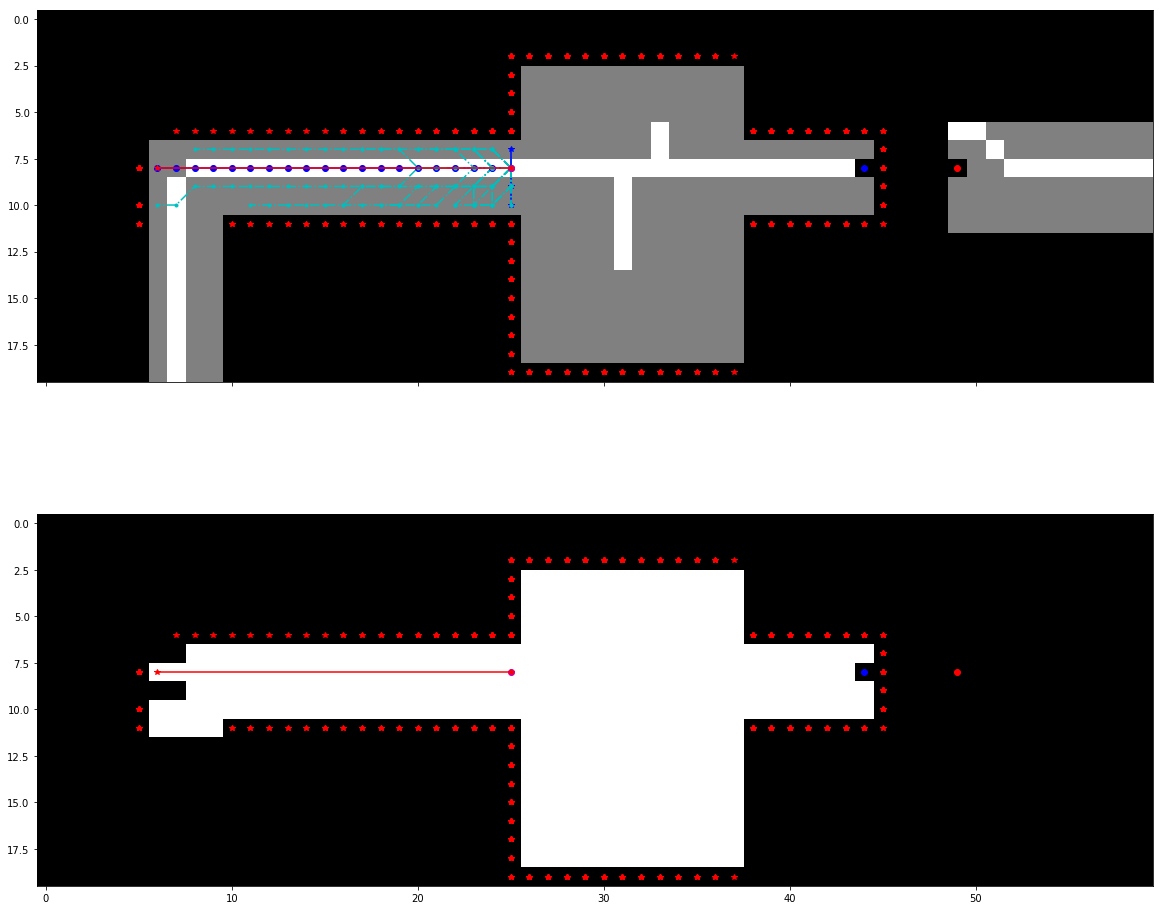

############################## 20


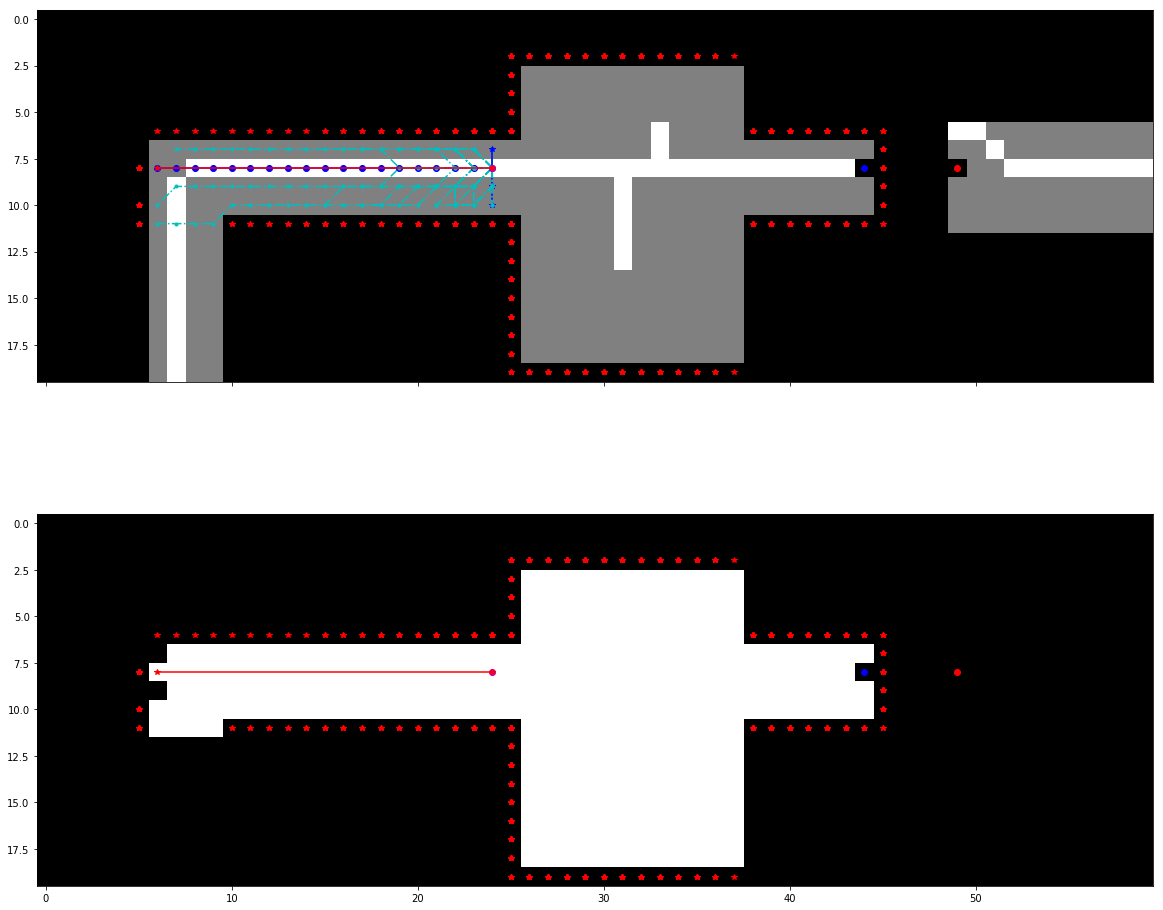

############################## 21


############################## 22


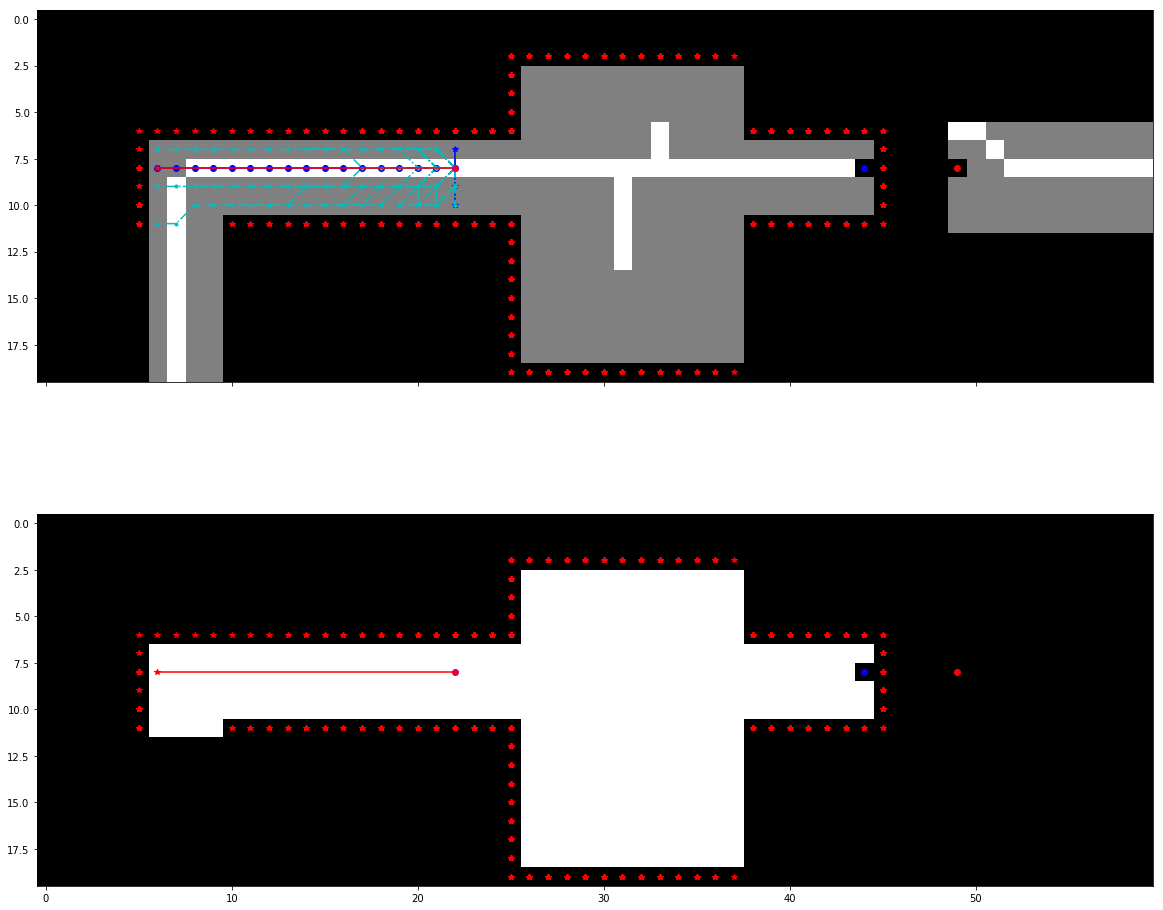

############################## 23


############################## 24


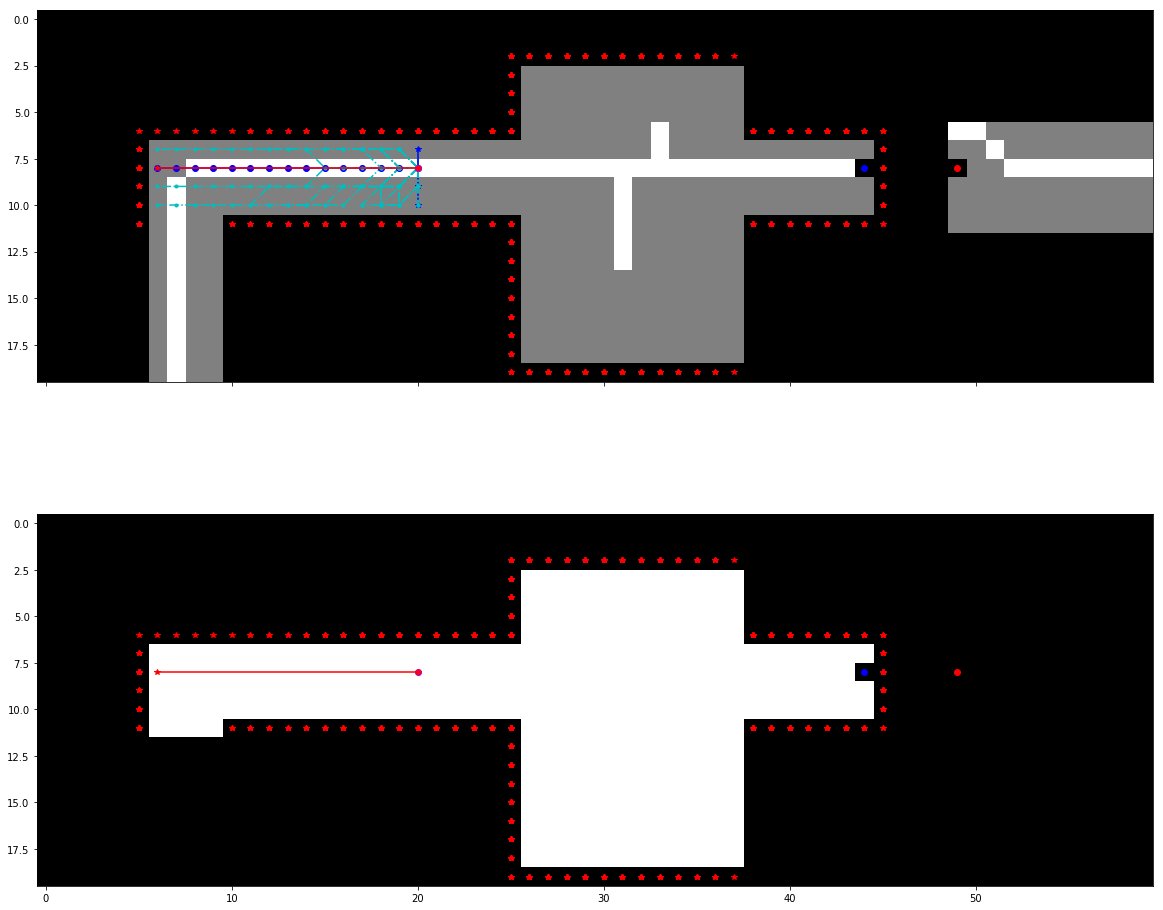

############################## 25


############################## 26


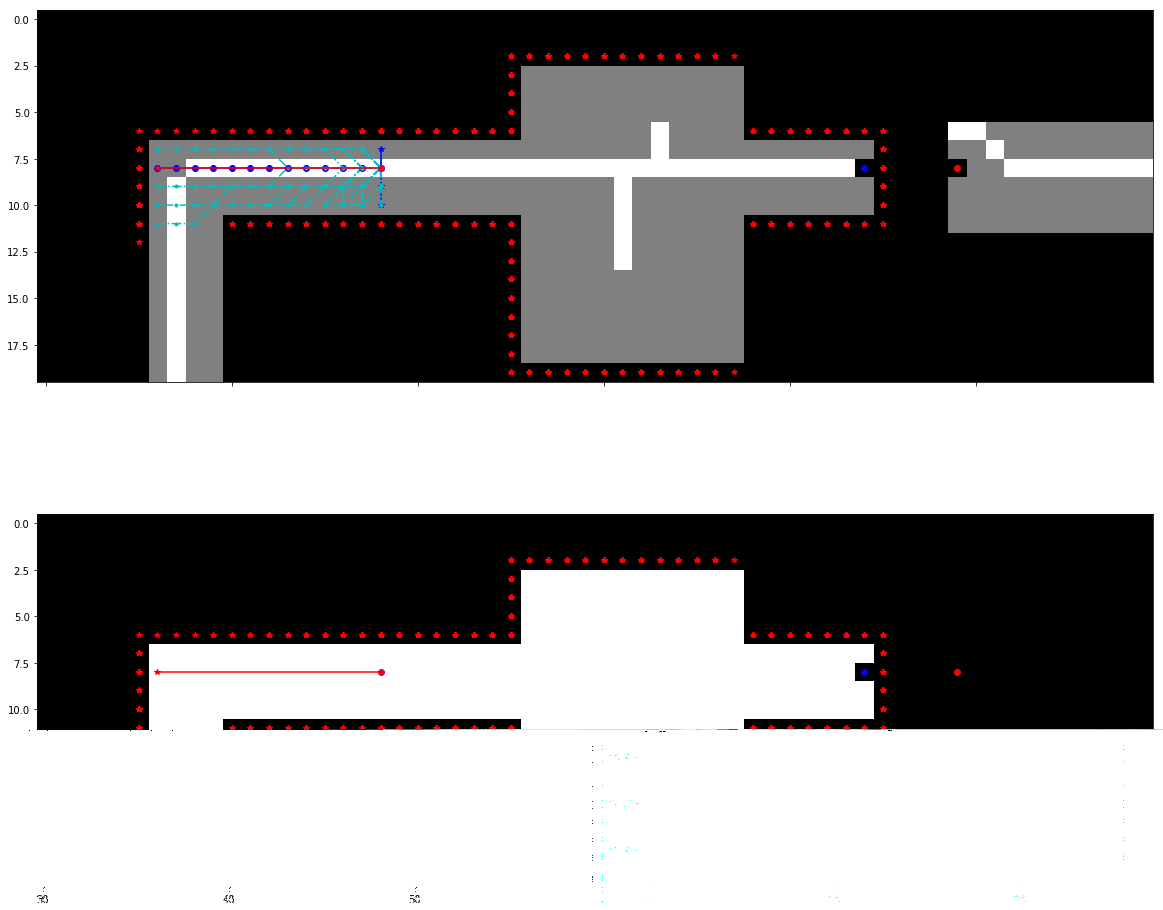

############################## 27


############################## 28


############################## 29


############################## 30


############################## 31


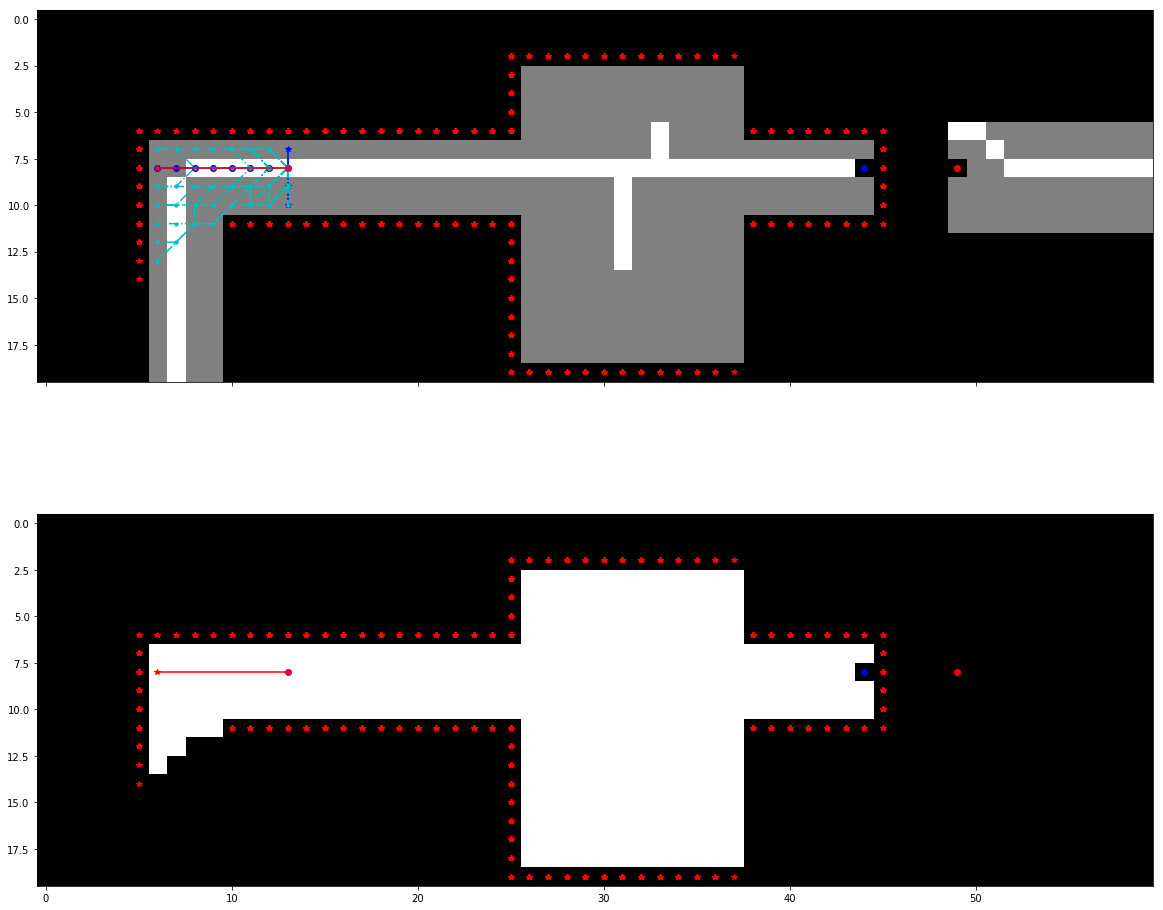

############################## 32


############################## 33


############################## 34


############################## 35


############################## 36


############################## 37


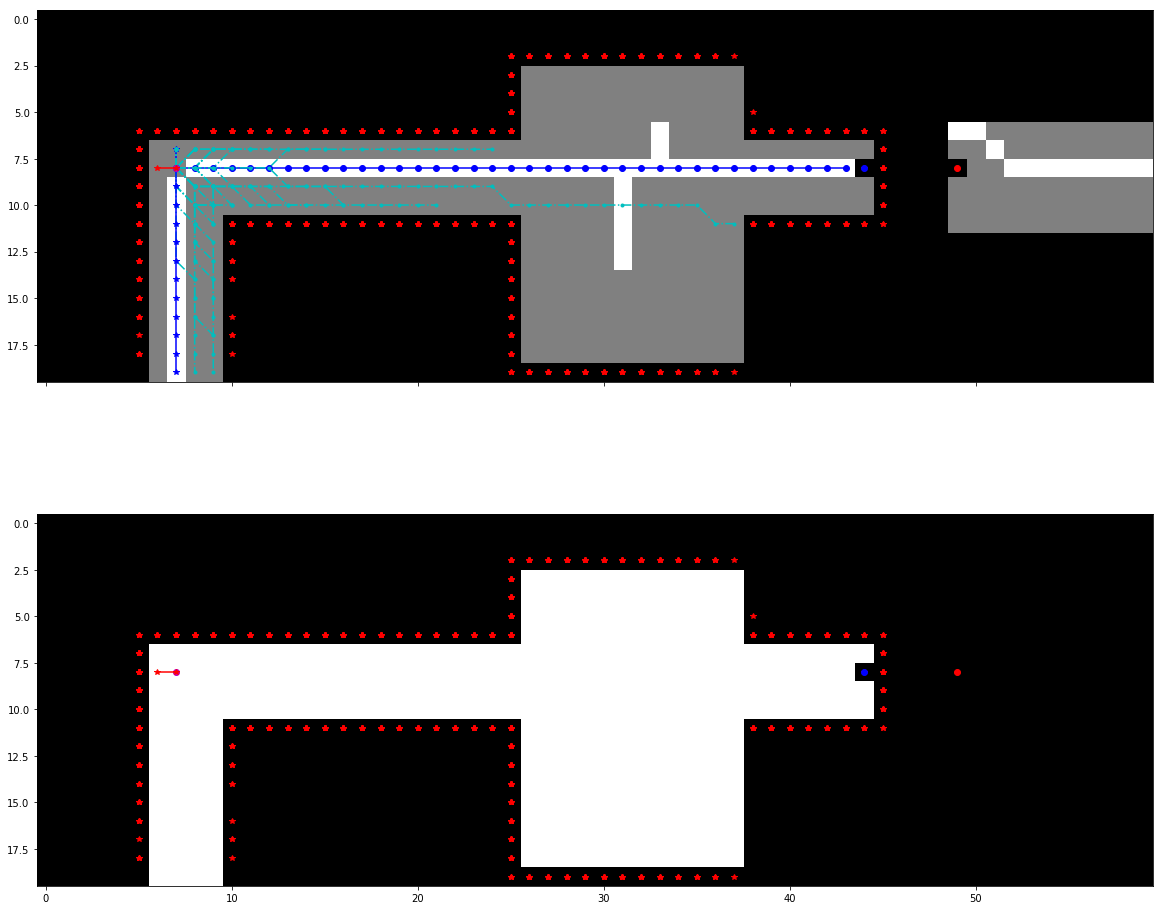

############################## 38
Target reached!
New target :%s [43  8]


############################## 39


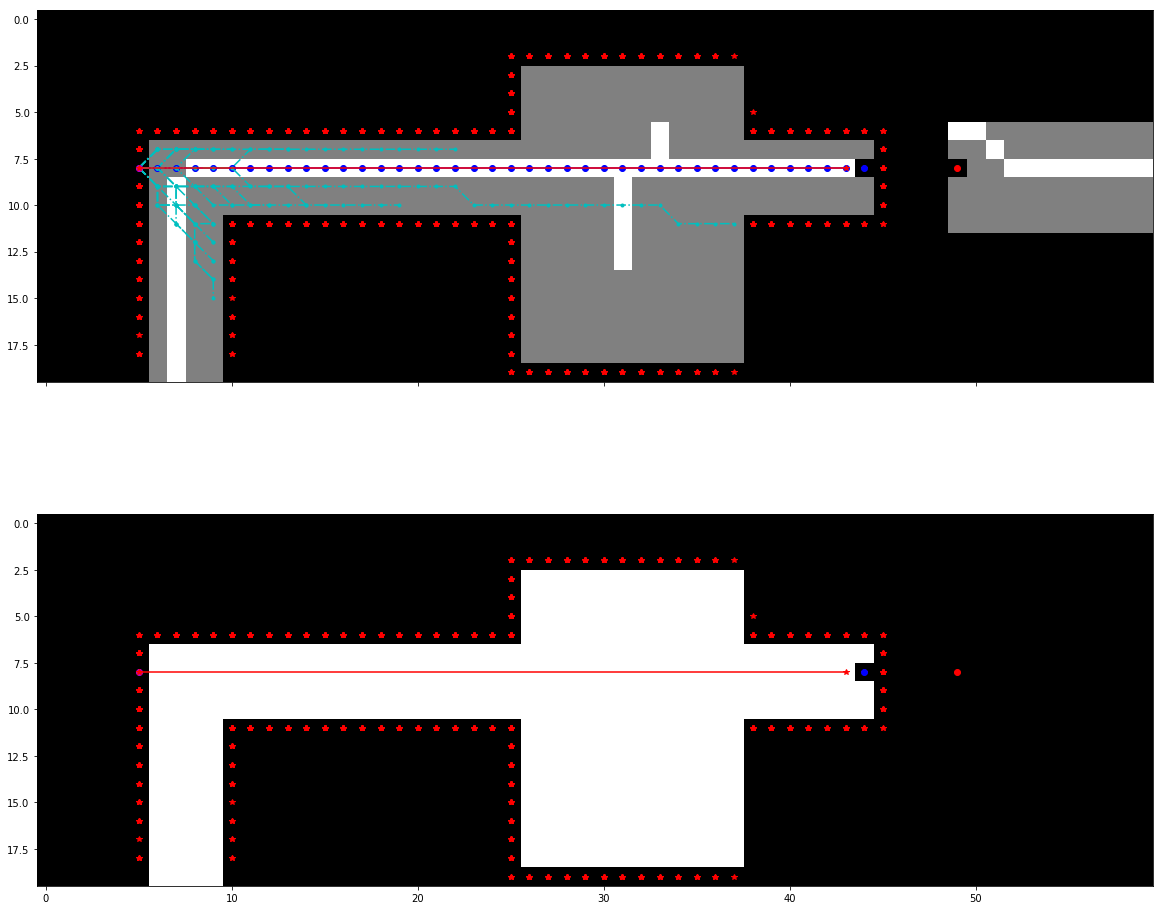

In [13]:
I = np.loadtxt("datadir/waydata.csv",dtype=int).reshape([100,100],order='F')
M = np.loadtxt("datadir/midpoints.csv",dtype=int,delimiter=',')
S = np.loadtxt("datadir/skeleton.csv",dtype=int).reshape([100,100],order='F')


plt.close("all") 

class Angles(object):
    steps = []
    degs = []
    rads = []
    mulA = 0
    stepA = 0
    minA = 0
    maxA = 0
    directions = {'n':[]}
    
    def __init__(self, stepA, minA, maxA):
        
        self.update(stepA, minA, maxA)
                
        self.stepA = stepA
        self.minA = minA
        self.maxA = maxA
        
    def update(self,stepA, minA, maxA):
        doUpd = False
        if (stepA != self.stepA): 
            self.stepA = stepA
            doUpd = True
        if (minA != self.minA):
            self.minA = minA
            doUpd = True
        if (maxA != self.maxA):
            self.maxA = maxA
            doUpd = True
            
        if doUpd:
            mulA = max(around(10./stepA),1)
            self.steps = np.arange(minA*mulA, mulA*maxA+1)
            self.degs = self.steps * stepA
            self.rads = self.degs * np.pi / 180.
            self.n = len(self.steps)
            self.NCELS = range(self.n)

def lidar( p, MAP, WMAP, borders, maxview, ang, lims  ):
    
    steps = np.arange(1,maxview,1)
    nSteps = len(steps)
    beams = {}
    dists = {}
    
    beamMax = {'v':0,'id':-1,'ang':-1}
    
    for i in ang.NCELS:
       
        theta = ang.rads[i]
        
        anyPoint = False
        anyBorders = False
        maxDist = None
        beam = []
        border = []
        for k in range(nSteps):
            s = steps[k]

            x = s*np.cos(theta) + p[0]
            y = s*np.sin(theta) + p[1]

            x = int(around(x))
            y = int(around(y))
            
               
            if (x <= lims['xmin']) | (x >= lims['xmax']):
                continue
            if (y <= lims['ymin']) | (y >= lims['ymax']):
                continue
                 
            if MAP[y,x] == NOWAY:
                WMAP[y,x] = NOWAY
                borders.append([x,y])
                anyBorders = True
                break
            else:         
                maxDist = dist_vuxy(p,x,y)   
                beam.append([x,y])            
                anyPoint = True
        
        if anyPoint:
            beam = np.c_[beam]
            beams[i] = beam
            dists[i] = maxDist
            if maxDist > beamMax['v']:
                beamMax['v'] = maxDist
                beamMax['id'] = i
                
        
    return beams, dists, beamMax, borders


    
def find_closet_midway_point(p,pnew,out,beams):
    x,y=pnew
    
    if MAP[y,x] == NOWAY: 
        if MAP[y+1,x] != NOWAY:
            y = y+1
        elif MAP[y-1,x] != NOWAY:
            y = y-1
        elif MAP[y,x+1] != NOWAY:
            x = x+1
        elif MAP[y,x-1] != NOWAY:
            x = x-1
    
     
    if MAP[y,x] == MIDWAY: return
    
    xmin = min(max(p[0]-1,0),max(pnew[0]-1,0))
    xmax = max(min(p[0]+2,100),min(pnew[0]+2,100))
          
    ymin = min(max(p[1]-1,0),max(pnew[1]-1,0))
    ymax = max(min(p[1]+2,100),min(pnew[1]+2,100))
    
    dMin = 1e6
    nn = pnew.copy()
    
    for x in range(xmin,xmax):
        for y in range(ymin,ymax):
            if MAP[y,x] == NOWAY:
                continue
            d = dist_vuxy(nn,x,y)
            if d < dMin:
                dMin = d
                nn[:] = x,y
                    
    out[:] = nn
    
def mark_weights(p, beams, MAP, W):
    
    for i in beams:
        beam = beams[i]
        for j in range(len(beam)):
            b = beam[j]
            x,y = b
            if MAP[y,x] == NOWAY:
                W[y,x] = 0
                plt.plot(x,y,'r.')
            else:
                d = dist_vu(p,b)
                W[y,x] = d
                plt.plot(x,y,'g.',ms=d) 
                
def rotate(beamMax, ang):
    i = beamMax['id']
    doUpdate = False
    if i >= ang.NCELS[-3]:
        doUpdate = True
        u = 9
    elif i <= ang.NCELS[2]:
        doUpdate = True
        u = -9
    if doUpdate:
        ang.update(ang.stepA, ang.minA+u, ang.maxA+u )
        return True
    else: 
        return False

def mark_seen(beams,WMAP):
    
    haveNewTarget = False
    newTarget = p.copy()
    
    for i in beams:
        beam = beams[i]
        for j in range(len(beam)):
            x,y = beam[j]
            
            WMAP[y,x] = SEEN

def plot_beams(ax,beams,p,ang):
    for i in beams:
        beam = beams[i]
        if len(beam):
            pb = np.c_[np.c_[p],beam.T].T
            if (i == 0) or (i == ang.n - 1): m = 'b-*'
            elif ( i == (ang.n - 1)//2): m = 'b-o'
            else: m = 'c-..'
            ax.plot(pb[:,0],pb[:,1],m)
            
def mark_target(p, beams, MAP, target ):
    
    haveNewTarget = False
    t = p.copy()
    
    for i in beams:
        beam = beams[i]
        
        for j in range(len(beam)-1,-1,-1):
            b = beam[j]
            x,y = b 
            if MAP[y,x] == NOWAY:
                continue
            else:
                d0 = dist_vu(p,t)
                d1 = dist_vu(p,b)
                if d0 < d1:
                    haveNewTarget = True
                    t[:] = x,y
            
    
    if haveNewTarget == True:
        target[:] = t

    return target

def plot_borders(ax,borders):
    
    b = np.c_[borders]
    
    for axi in ax:
        axi.plot(b[:,0],b[:,1],'r*')
    
def mark_borders(borders,WMAP):
    
    for b in borders:
        x,y = b
        WMAP[y,x] = NOWAY

def is_target_reached(p,target):
    px,py = p
    tx,ty = target
    if (px == tx) and (py == ty):
        print("Target reached!")
        return True
    else:
        return False

def mark_good_to_go(p,beams,WMAP):
    pass

UNKNOWN = -1
NOWAY = 0
ISWAY = 1
MIDWAY = 2
TARGET  = 3
VISITED = 4
SEEN = 5
BEHIND = 6

I[S==1]=MIDWAY


pnew = np.r_[0,0]


targetLast = None

targets = np.zeros([10000,2])
route = np.zeros([10000,2])

borders = []
def move(p, pstart, targets, target,i, MAP, maxview, ang, lims, borders):
   
    route[i] = p
    
    fig, ax = plt.subplots(2,1, sharex='col', sharey='row',figsize=(20,17))
    ax = ax.ravel()
    for axi in ax:
        axi.plot(44-st,8,'bo',zorder=5)
        axi.plot(49-st,8,'ro',zorder=5)

    while True:
    
        beams, dists, beamMax, borders = lidar( p, MAP, WMAP, borders, maxview, ang, lims )
    
        mark_seen(beams, WMAP)
    
        isRotated = rotate(beamMax, ang)
        
        if not isRotated: break
    
    mark_borders(borders,WMAP)
    plot_borders(ax, borders)
    plot_beams(ax[0],beams,p,ang)
    
    mark_seen(beams,  WMAP)
    
    #mark_passed(p, WMPA)
    
    #mark_weights(pstart, beams, MAP, W)
    
    doNewTarget = is_target_reached(p,target)
    if doNewTarget:
        target = mark_target(p, beams,MAP,target)
        print("New target :%s",target)
    else:
        pass
    for axi in ax:
        axi.plot([p[0],target[0]],[p[1],target[1]],'r-*',zorder=10)
        
    targets[i] = target
    #mark_seen_and_target(p,beams,MAP,target)
    
    #mark_visited(p,MAP)

    #next_step_p2t(p,target[i],pnew)
    
    #find_closet_midway_point(p,pnew,pnew,MAP)
       
    ax[0].imshow(MAP,cmap=plt.cm.gray, animated=True)
    ax[1].imshow(WMAP,cmap=plt.cm.gray, animated=True)
        
    for x in range(0,lims['xmax']-lims['xmin']):
        for y in range(0,lims['ymax']-lims['ymin']):
            if WMAP[y,x] == UNKNOWN:
                ax[1].plot(x,y,'r.')
        
    #build_map(I1,border)

    #onpath = gps_cango(I1,cango)
    
    for axi in ax:
        axi.plot(p[0],p[1],'mo')
    
    pnew = np.r_[p[0]-1,p[1]]
    #plt.show()
    
       
    #x,y = move_step(p,onpath[0])
    
    #get_new_angle(p,x,y)
    
    #print(p,onpath[0],x,y)
       
    plt.show()
    
    
    return pnew

maxview = 50
px = 44
py = 8
st = 0
px -= st
lims = dict(xmin=st,xmax=60,ymin=0,ymax=20)

MAP = I[:20,st:60]
WMAP = -1*np.zeros([100,100])[:20,st:60]
p = np.r_[px,py]
pstart = p.copy()

minAng = -9
maxAng = 9
ang = 5

ang = Angles(ang,minAng,maxAng)
target = p.copy()

for i in range(40):
    print ("#"*30,i)
    p = move(p,pstart,targets,target,i,MAP,maxview,ang,lims, borders)

20 60


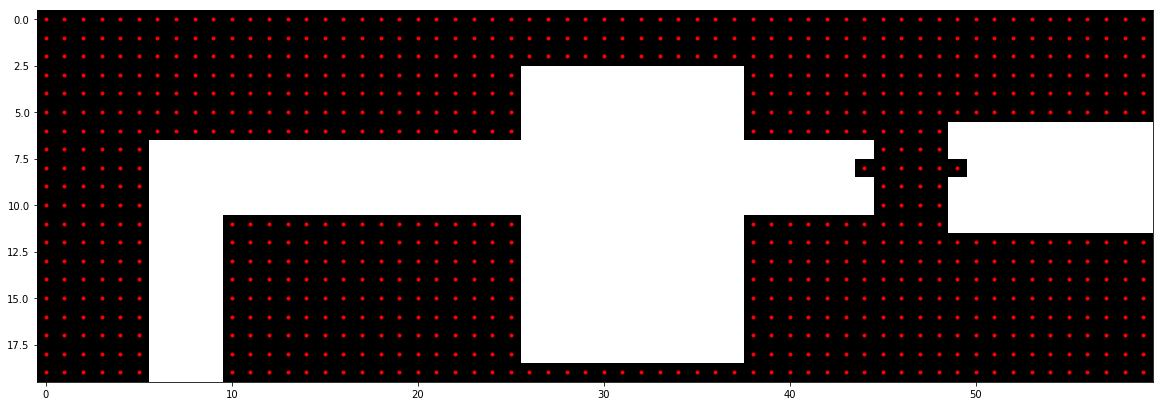

In [21]:
I = np.loadtxt("datadir/waydata.csv",dtype=int).reshape([100,100],order='F')
M = np.loadtxt("datadir/midpoints.csv",dtype=int,delimiter=',')
S = np.loadtxt("datadir/skeleton.csv",dtype=int).reshape([100,100],order='F')

maxview = 50
px = 44
py = 8
st = 0
px -= st
lims = dict(xmin=st,xmax=60,ymin=0,ymax=20)

MAP = I[:20,st:60]
WMAP = -1*np.zeros([100,100])[:20,st:60]
p = np.r_[px,py]

n,m = MAP.shape
print(n,m)
plt.figure(figsize=(20,17))
plt.imshow(MAP,cmap=plt.cm.gray)
for x in range(m):
    for y in range(n):
        if (MAP[y,x] == NOWAY):
            plt.plot(x,y,'r.')
           

plt.show()

In [ ]:
plt.figure()
I = np.loadtxt("skeleton.csv",dtype=int).reshape([100,100],order='F')
plt.imshow(I,cmap=plt.cm.gray)
plt.show()

In [ ]:
plt.figure()
I = np.loadtxt("midpoints.csv",dtype=int,delimiter=',')
I[:,1]*=-1
plt.plot(I[:,0],I[:,1],'.')
plt.show()



In [ ]:
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint as ppr

In [ ]:
mean = np.mean(I,axis=0)


Y = I - mean

anyLeft = True

Z = Y

i = 0
idx = 0
y= Y[i]
Z = Y[i+1:]
lenZ = len(Z)
lst = []
lst.append(y)

nn = {}
k = 0

while i < 485:
    i+=1
    Z = Z[np.arange(len(Z))!=idx]
    idx = NearestNeighbors(3,radius=1).fit(Z ).kneighbors(y, 1, return_distance=False)[0][0]
    z = Z[idx]
    d = dist(y,z)
    y=z
    lenZ = len(Z)
    lst.append(z)
    
    
V = np.c_[lst]


plt.plot(V[:,0],V[:,1],'o-')

plt.plot(Y[:,0],Y[:,1],'.')
plt.show()




In [ ]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt

# define pts from the question
pts = np.array([[ 6.55525 ,  3.05472 ],
   [ 6.17284 ,  2.802609],
   [ 5.53946 ,  2.649209],
   [ 4.93053 ,  2.444444],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2.64013 ,  2.4375  ],
   [ 2.275444,  2.653124],
   [ 2.137945,  3.26562 ],
   [ 2.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  6.75021 ],
   [ 3.32448 ,  6.66353 ],
   [ 3.31582 ,  5.68866 ],
   [ 3.35159 ,  5.17255 ],
   [ 3.48482 ,  4.73125 ],
   [ 3.70669 ,  4.51875 ],
   [ 4.23639 ,  4.58968 ],
   [ 4.39592 ,  4.94615 ],
   [ 4.33527 ,  5.33862 ],
   [ 3.95968 ,  5.61967 ],
   [ 3.56366 ,  5.73976 ],
   [ 3.78818 ,  6.55292 ],
   [ 4.27712 ,  6.8283  ],
   [ 4.89532 ,  6.78615 ],
   [ 5.35334 ,  6.72433 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 5.44711 ,  4.26519 ],
   [ 5.04087 ,  4.10581 ],
   [ 4.70013 ,  3.67405 ],
   [ 4.83482 ,  3.4375  ],
   [ 5.34086 ,  3.43394 ],
   [ 5.76392 ,  3.55156 ],
   [ 6.37056 ,  3.8778  ],
   [ 6.53116 ,  3.47228 ]])

In [ ]:
plt.plot(pts[:,0], pts[:,1], 'r-')
plt.show()

In [ ]:

tck, u = splprep(pts.T, u=None, s=0.0, per=1) 
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)
plt.plot(pts[:,0], pts[:,1], 'ro')
plt.plot(x_new, y_new, 'b--')
plt.show()

In [ ]:
dist, idx = NearestNeighbors(20,radius=1).fit(Y ).kneighbors(Y[0], 10, return_distance=True)

idx = idx[0]

print(dist,idx,Y[0])

nn = Y[idx]
print(nn)

plt.plot(nn[:,0],nn[:,1],'.')
plt.plot(Y[0,0],Y[0,1],'o')
plt.show()

In [ ]:
mean = np.mean(I,axis=0)


Y = I - mean
clf = NearestNeighbors(3,radius=5).fit(Y )

G = clf.kneighbors_graph()

T = nx.from_scipy_sparse_matrix(G)

order = list(nx.dfs_preorder_nodes(T, 0))


x = Y [order,0]
y = Y [order,1]

plt.plot(x, y,'.-')
plt.show()

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(I)
voronoi_plot_2d(vor)
plt.show()

In [ ]:
from skimage.morphology import skeletonize
X, Y = np.ogrid[0:9, 0:9]
ellipse = (1./3 * (X - 4)**2 + (Y - 4)**2 < 3**2).astype(np.uint8)
print(ellipse)
skel = skeletonize(ellipse)
print(skel.astype(np.uint8))


In [ ]:
import numpy as np

def lerp(v, u, i):
    w = v + i * (u - v)
    return int(w)

def dist(x0,x1, y0,y1):
    return int(((x0-x1)**2 + (y0-y1)**2)**0.5)

def generate_line(p1,p2):
    lst = []
    xs = p1[0]
    xe = p2[0]
    ys = p1[1]
    ye = p2[1]
    n = dist(xs,xe,ys,ye)
    for i in range(n+1):
        x = lerp(xs,xe,1./n*i)
        y = lerp(ys,ye,1./n*i)
        lst.append([x,y])
    return np.c_[lst]

def getEquidistantPoints(p1, p2, n):
    lst = [[lerp(p1[0],p2[0],1./n*i), lerp(p1[1],p2[1],1./n*i)] for i in range(n+1)]
    return np.c_[lst]

pts = generate_line((0,0), (-5,5))

import matplotlib.pyplot as plt

plt.plot(pts[:,0],pts[:,1],'.-')
plt.plot([0,0,10,10],[0,10,0,10],'.')
plt.show()



In [ ]:
j=0
for i in range(72):
    j = (j + 1) % 36
    print (i,j )